In [40]:
#Import Dependencies 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [21]:
car_df = pd.read_csv('/content/car data.csv')

In [22]:
car_df.shape

(301, 9)

In [23]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [25]:
print(car_df.Transmission.unique())

['Manual' 'Automatic']


In [26]:
car_df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [27]:
car_df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [28]:
car_df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [29]:
#Encoding categorical Data
#1./Fuel_Type 
car_df.replace({'Fuel_Type' : {'Petrol' : 0 , 'Diesel' : 1 , 'CNG' : 2 }},inplace = True)

In [30]:
#2./Transmission  
car_df.replace({'Transmission' : {'Manual' : 0 , 'Automatic' : 1 }},inplace = True)

In [31]:
#3./Seller_Type
car_df.replace({'Seller_Type' : {'Dealer' : 0 , 'Individual' : 1}}, inplace = True)

In [32]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [33]:
#Train_Test_sPLIT 
#First Separate Features and target 
X = car_df.drop(columns=['Car_Name', 'Selling_Price'], axis = 1)
Y = car_df['Selling_Price']

In [34]:
X_train, X_test , Y_train , Y_test  = train_test_split(X,Y,test_size = .1 , random_state = 2)

In [35]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(301, 7)
(270, 7)
(31, 7)


In [36]:
#Linear Regression
model_lr = LinearRegression()
model_lasso = Lasso()

In [37]:
#Train Linear Regression Model 
model_lr.fit(X_train,Y_train)

LinearRegression()

In [38]:
#Train Lasso Model 
model_lasso.fit(X_train,Y_train)

Lasso()

In [39]:
#Evaluating Linear Regression 
predictions_lr = model_lr.predict(X_test)
error = metrics.r2_score(Y_test,predictions_lr)
print('Error for Linear Regression Model on Test Data : ', error)

Error for Linear Regression Model on Test Data :  0.8365766715027051


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices Linear Regression')

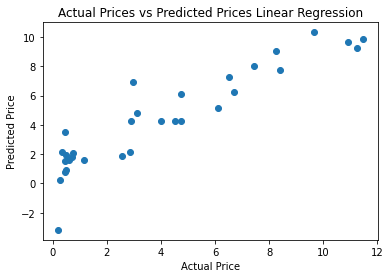

In [43]:
plt.scatter(Y_test,predictions_lr)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices Linear Regression')

In [42]:
#Evaluating Lasso 
predictions_lasso = model_lasso.predict(X_test)
error_lasso = metrics.r2_score(Y_test,predictions_lasso)
print('Error for Linear Regression Model on Test Data : ', error_lasso)

Error for Linear Regression Model on Test Data :  0.8709167941173195


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices Lasso')

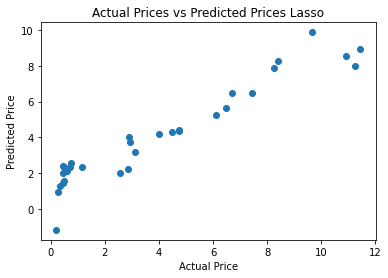

In [44]:
plt.scatter(Y_test,predictions_lasso)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices Lasso')